# Bank marketing campaigns dataset analysis - Opening a Term Deposit

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

## Dataset

### Bank's Client Data:

1. age (numeric)

2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5. default: has credit in default? (categorical: "no","yes","unknown")

6. housing: has housing loan? (categorical: "no","yes","unknown")

7. loan: has personal loan? (categorical: "no","yes","unknown")

### Info related with the last contact of the current campaign:

8. contact: contact communication type (categorical: "cellular","telephone")

9. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

10. dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client (numeric)

15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and economic context attributes

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)

17. cons.price.idx: consumer price index - monthly indicator (numeric)

18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19. euribor3m: euribor 3 month rate - daily indicator (numeric)

20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21. y: has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


%matplotlib inline

/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv


## Creating Support Functions and Loading the Data

In [ ]:
# The code was removed by Watson Studio for sharing.

In [ ]:
def replace_outliers(df, features):
    '''Replace outliers with value of the outlier step (1.7 times interquartile)
    
    INPUT
    -----
    df: Panda Dataframe
    features: list
              List of columns to replace outliers
    
    RETURNS
    -------
    df: Panda Dataframe
        Dataframe with no outlier
    '''
    for col in features:
        print("[INFO] COLUMN: ", col)
        # 1st quartile
        Q1 = np.percentile(df[col], 25)
        # 3d quartile
        Q3 = np.percentile(df[col], 75)
        # Interquartile
        IQR = Q3 - Q1
        print("[INFO] VALUE OF INTERQUARTILE: ", IQR)

        # Outlier step
        outlier_step = 1.5 * IQR
        print("[INFO] VALUE TO REPLACE: >", outlier_step)

        df[col].loc[df[col] > outlier_step]  = outlier_step
    return df

In [1]:
def etl_df(df):
    """Prepare the dataframe to be used for predictions following the
    follow steps:
    1 - Label encoding
    2 - Changing pdays to binary (now it is previously contacted or not)
    3 - One-hot-enconding the columns 'job'
    4 - Removing outlier
    
    Parameters
    ----------
    df: dataframe
        The dataframe resulted from etl.
    
    Returns
    -------
    df: dataframe
        The dataframe with its new features and ready for training
    """
    new_df = df
    label_encoder = LabelEncoder()

    column_list = ['marital', 'education', 'default', 'housing', 'loan', 'month',
                   'day_of_week', 'poutcome']
    
    
    for column in column_list:
        new_df[column] = label_encoder.fit_transform(df[column])
    
    new_df = get_dummies(new_df, prefix=['job'], columns=['job'], drop_first=True)
    
    non_categorical_cols = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
                        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
    
    new_df = replace_outliers(new_df, non_categorical_cols)
    
    return new_df

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [17]:
df_eng = etl_df("../input/bank-marketing-campaigns-dataset/bank-additional-full.csv", delimiter=";")

# 5. Define a model

## 5.1. Data Preparation
The first step is to prepare the data. We will scale our data and separate the dataset in train_test using train_test_split stratified. 

In [56]:
y = df_eng['y']
X = df_eng.drop('y',axis=1)

In [57]:
scaler = MinMaxScaler()

df_array = X

scaled_data = scaler.fit_transform(df_array)
scaled_data

array([[1.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.33333333, 0.85714286, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.71428571, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.33333333, 0.71428571, ..., 0.        , 0.        ,
        0.        ]])

Now, we will create a train and test dataset. As our target class is unbalanced, we need to stratify so the train and test model has the same ratio of 0 and 1.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.3, random_state=1, stratify=y)

As before, we will create a function for this step.

In [59]:
def prepare_for_training(df):
    """Prepara the dataframe to be trained by a machine learning algorithm
    
    Parameters:
    -----------
    df: dataframe
        The dataframe to be prepared
    
    Returns:
    --------
    X_train: array
        The train input
    X_test: array
        The test input
    y_train: array
        The train target (labels)
    y_test: array
        The test target (labels)
    """
    y = df['y']
    X = df.drop('y',axis=1)
    
    scaler = MinMaxScaler()
    df_array = X
    scaled_data = scaler.fit_transform(df_array)
    
    return train_test_split(scaled_data, y, test_size=0.3, random_state=1, stratify=y)

In [60]:
#X_train, X_test, y_train, y_test = prepare_for_training(df_onehot)

## 5.2. Finding the best classifier.

## **ATTENTION! THIS SECTION TAKES A LONG TIME TO RUN! (ABOUT 3.5 HOURS)**
We will try a few models and compare them. We will use GridSearch to compare them adjusting the parameters.

### Non-Deep Learning Classifier:
- Extra Trees
- GradientBoosting
- AdaBoosting
- K Neighbors

### Deep Learning Classifier:
- MLP

In [61]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

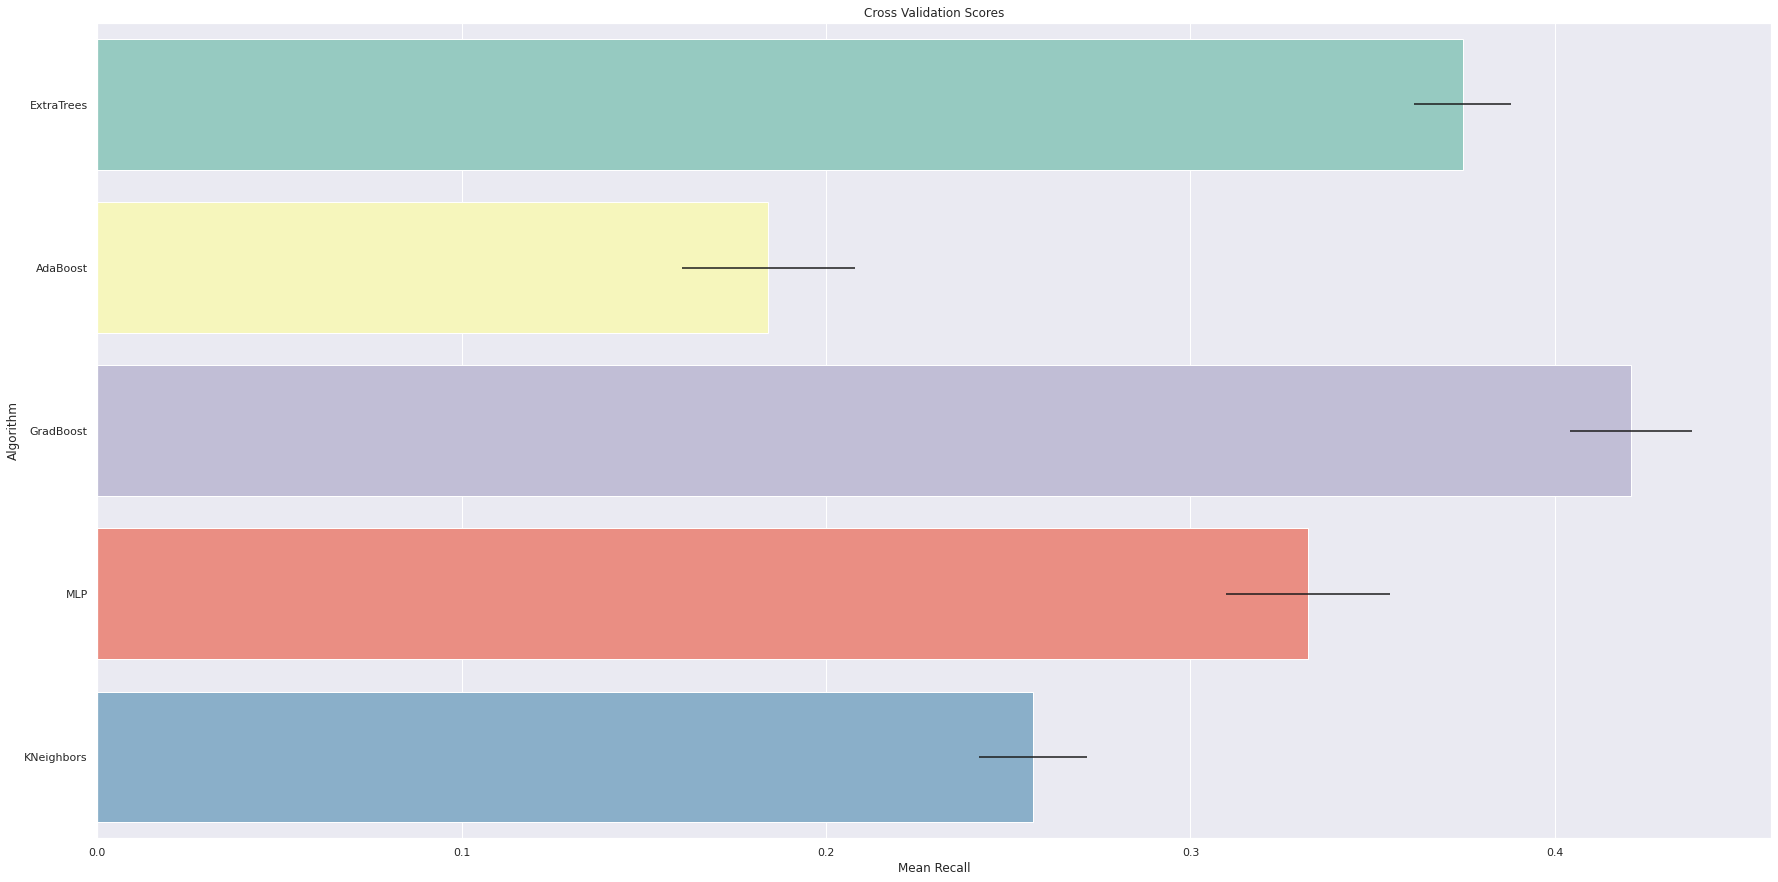

In [62]:
min_samples_split = 3
random_state = 8
max_depth = None
n_estimators = 30
learning_rate = 0.1

# Create Classifiers
extra_trees = ExtraTreesClassifier(n_estimators=n_estimators, 
                                   max_depth=max_depth, 
                                   min_samples_split=min_samples_split, 
                                   random_state=random_state)
adaboost = AdaBoostClassifier(n_estimators=n_estimators, 
                              learning_rate=learning_rate, 
                              random_state=random_state)
gradient_boosting = GradientBoostingClassifier(n_estimators=n_estimators, 
                                               learning_rate=learning_rate, 
                                               max_depth=max_depth, 
                                               random_state=random_state)
mlp_classifier = MLPClassifier(random_state=random_state)
kneighbors = KNeighborsClassifier()

kfold = StratifiedKFold(n_splits=10)
classifiers = [extra_trees, adaboost, gradient_boosting, mlp_classifier, kneighbors]

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring='recall', cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means, "CrossValErrors": cv_std, 
                       'Algorithm':['ExtraTrees', 'AdaBoost', 'GradBoost', 'MLP', 'KNeighbors' ]})
g = sns.barplot("CrossValMeans", 'Algorithm', data=cv_res, palette='Set3', orient='h', **{'xerr':cv_std})
g.set_xlabel("Mean Recall")
g = g.set_title('Cross Validation Scores')

#### Now let's tune the hyperparameters.

Adaboost - Hyper Parameters

In [64]:
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=random_state)
ada_param_grid={'base_estimator__criterion' : ['gini', 'entropy'], 
               'base_estimator__splitter' : ['best', 'random'],
               'algorithm': ['SAMME', 'SAMME.R'],
               'n_estimators' : [1,2],
               'learning_rate': [1, 0.1, 0.5, 0.01, 0.03, 0.05, 0.001, 0.005, 0.0001]}
gsadaDTC = GridSearchCV(adaDTC, param_grid=ada_param_grid, cv=kfold, 
                        scoring='recall', n_jobs=4, verbose=1)
gsadaDTC.fit(X_train, y_train)
ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   20.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   36.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 1440 out of 1440 | elapsed:  1.9min finished


In [65]:
ada_best

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1, n_estimators=2, random_state=8)

In [66]:
gsadaDTC.best_score_

0.4553561253561254

In [67]:
# ExtraTrees

ExtC = ExtraTreesClassifier()

ex_param_grid = {"max_depth" : [None],
                'max_features' : [1, 3, 5, 10, 12],
                'min_samples_split' : [2, 3, 10],
                'min_samples_leaf' : [1, 3, 10],
                'bootstrap' : [False],
                'n_estimators' : [50, 100, 300],
                'criterion' : ['gini']}
gsExtC = GridSearchCV(ExtC, param_grid=ex_param_grid, cv=kfold,
                     scoring='recall', n_jobs=4, verbose=1)
gsExtC.fit(X_train, y_train)

ExtC_best = gsExtC.best_estimator_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   50.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 15.9min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 32.3min
[Parallel(n_jobs=4)]: Done 1350 out of 1350 | elapsed: 36.5min finished


In [68]:
ExtC_best

ExtraTreesClassifier(max_features=12, n_estimators=300)

In [69]:
gsExtC.best_score_

0.4273428300094967

In [70]:
# MLP
MLP = MLPClassifier()

mlp_param_grid = {'activation' : ['tanh', 'relu', 'logistic'],
                  'solver': ['sgd', 'adam'],
                  'alpha' : [0.0001, 0.001, 0.01],
                  'learning_rate' : ['constant', 'adaptative'],
                  'learning_rate_init' : [0.001, 0.0001],
                 }
gsMLP = GridSearchCV(MLP, param_grid=mlp_param_grid, cv=kfold,
                    scoring='recall', n_jobs=2, verbose=1)

gsMLP.fit(X_train, y_train)
MLP_best = gsMLP.best_estimator_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 15.3min
[Parallel(n_jobs=2)]: Done 228 tasks      | elapsed: 41.8min
[Parallel(n_jobs=2)]: Done 542 tasks      | elapsed: 88.8min
[Parallel(n_jobs=2)]: Done 720 out of 720 | elapsed: 105.8min finished
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [71]:
MLP_best

MLPClassifier()

In [72]:
gsMLP.best_score_

0.3676134852801519

In [73]:
# Gradient Boosting
GBC = GradientBoostingClassifier()
gbc_param_grid = {'loss' : ['deviance'],
                'n_estimators' : [100, 200, 300],
                'learning_rate' : [0.1, 0.05, 0.01, 0.001],
                'max_depth' : [4, 8],
                'min_samples_leaf' : [100, 150],
                'max_features' : [0.3, 0.1]
                }
gsGBC = GridSearchCV(GBC, param_grid=gbc_param_grid, cv=kfold, 
                     scoring='recall', n_jobs=2, verbose=1)

gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  6.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 15.2min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 26.6min
[Parallel(n_jobs=2)]: Done 960 out of 960 | elapsed: 32.6min finished


In [74]:
GBC_best

GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=150,
                           n_estimators=300)

In [75]:
gsGBC.best_score_

0.4104102564102564

In [76]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, 
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    '''Generate a simple plot of the test and training learning curve
    '''
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.mean(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                    train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                    test_scores_mean + test_scores_std, alpha=0, color='b')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='b', label='Cross Validation Score')
    
    plt.legend(loc='best')
    return plt

/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


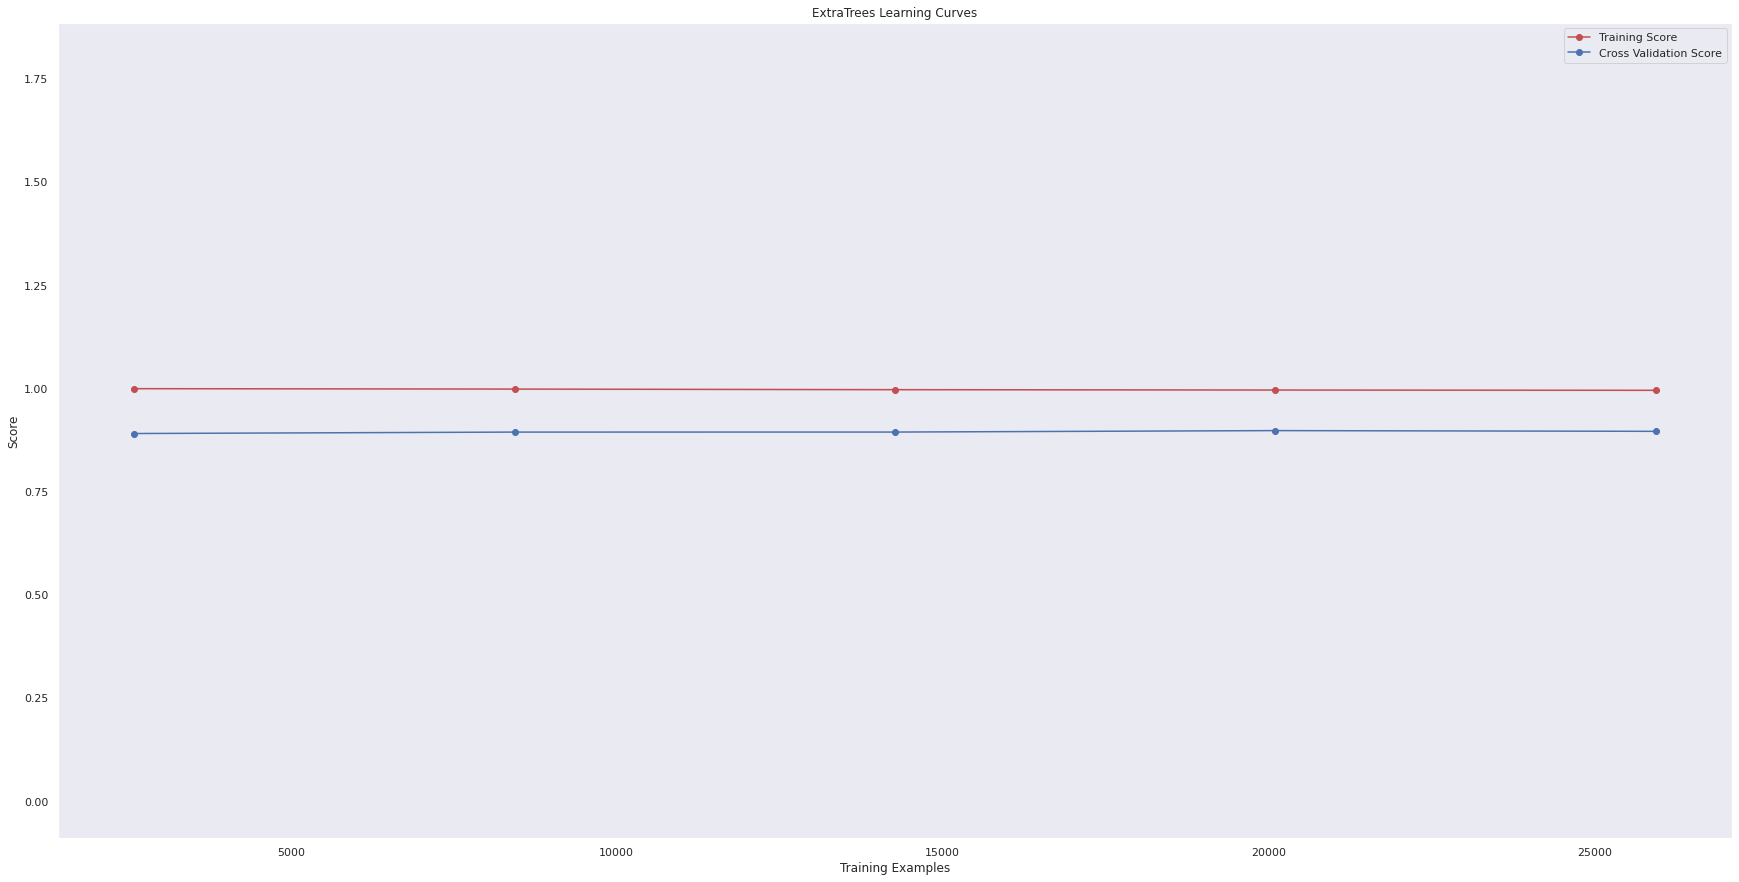

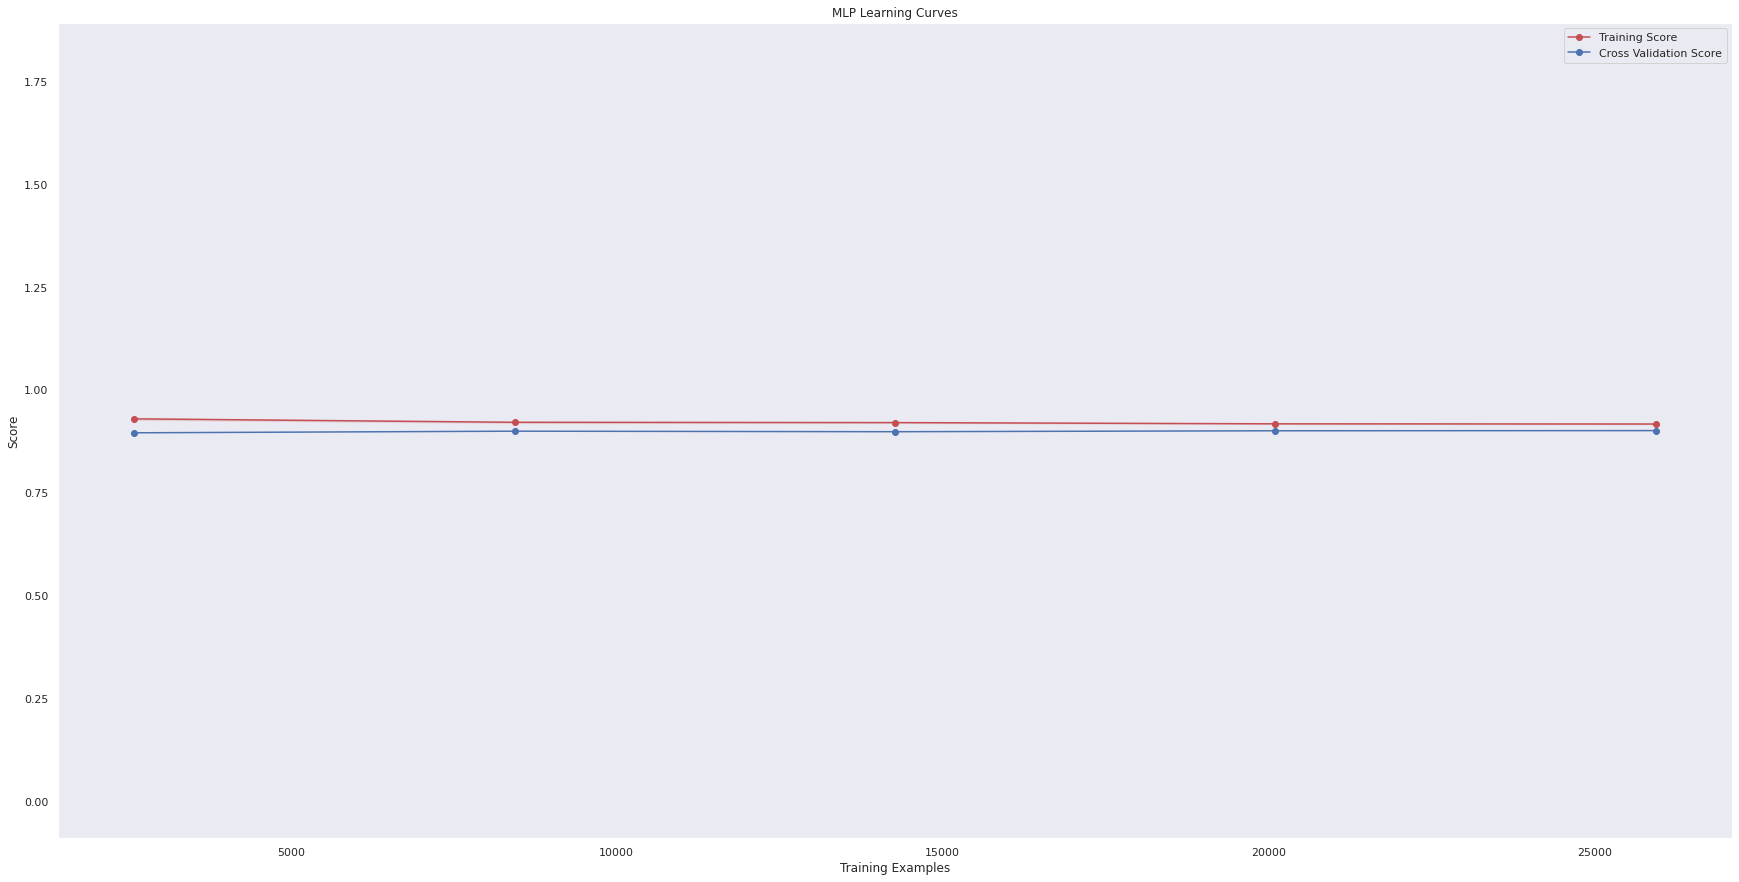

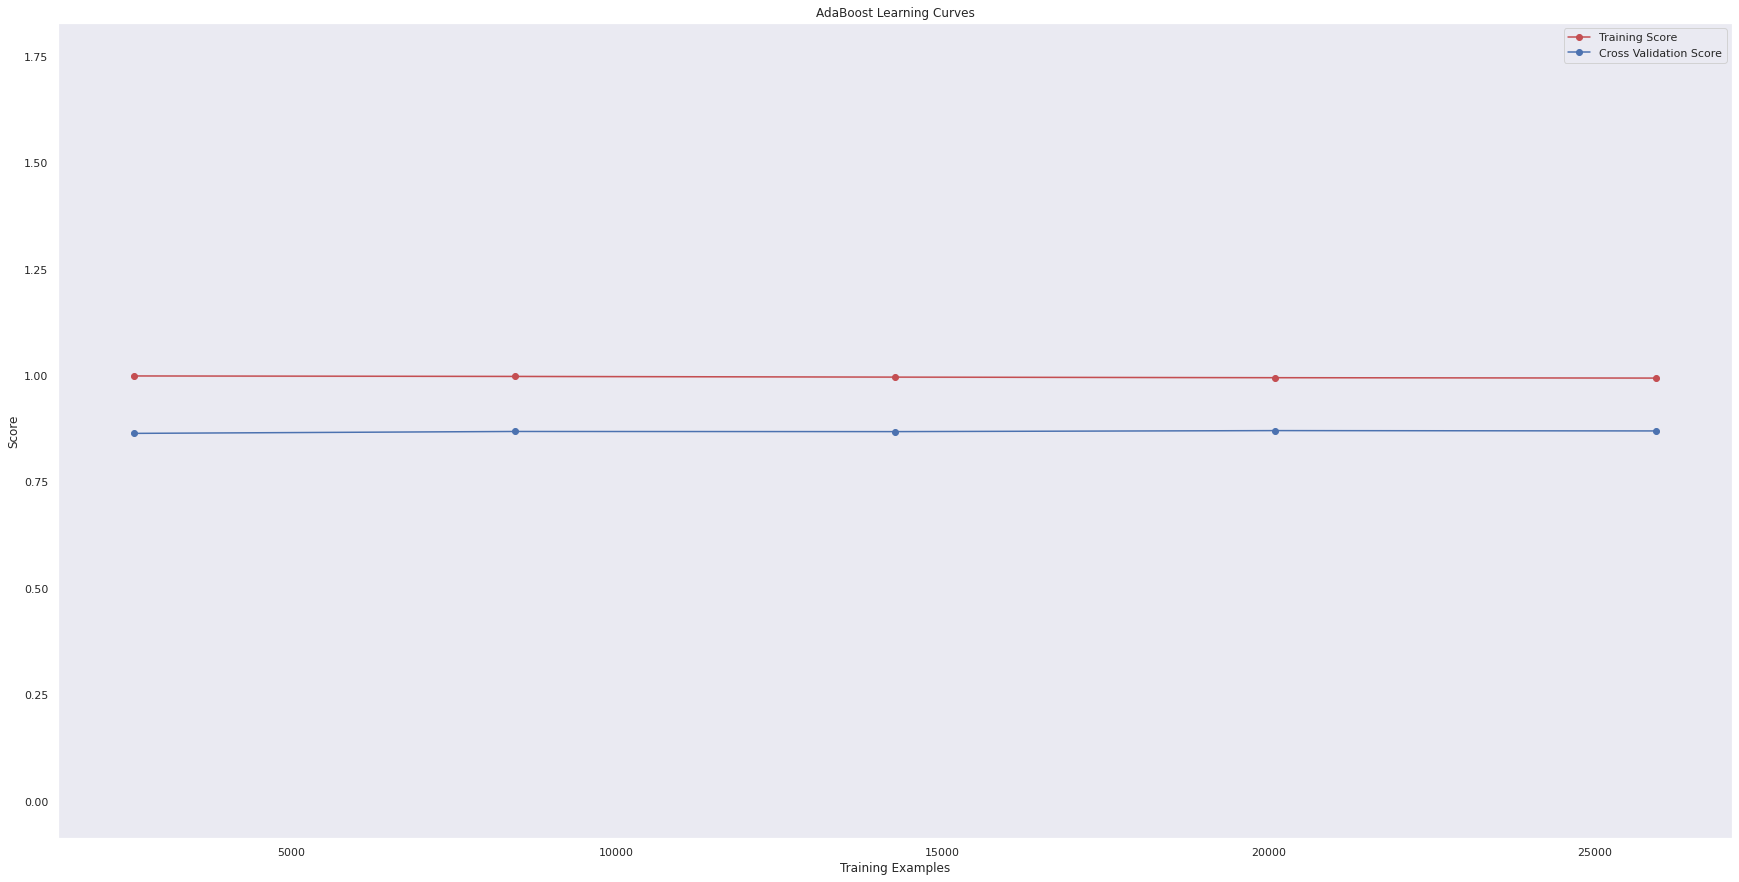

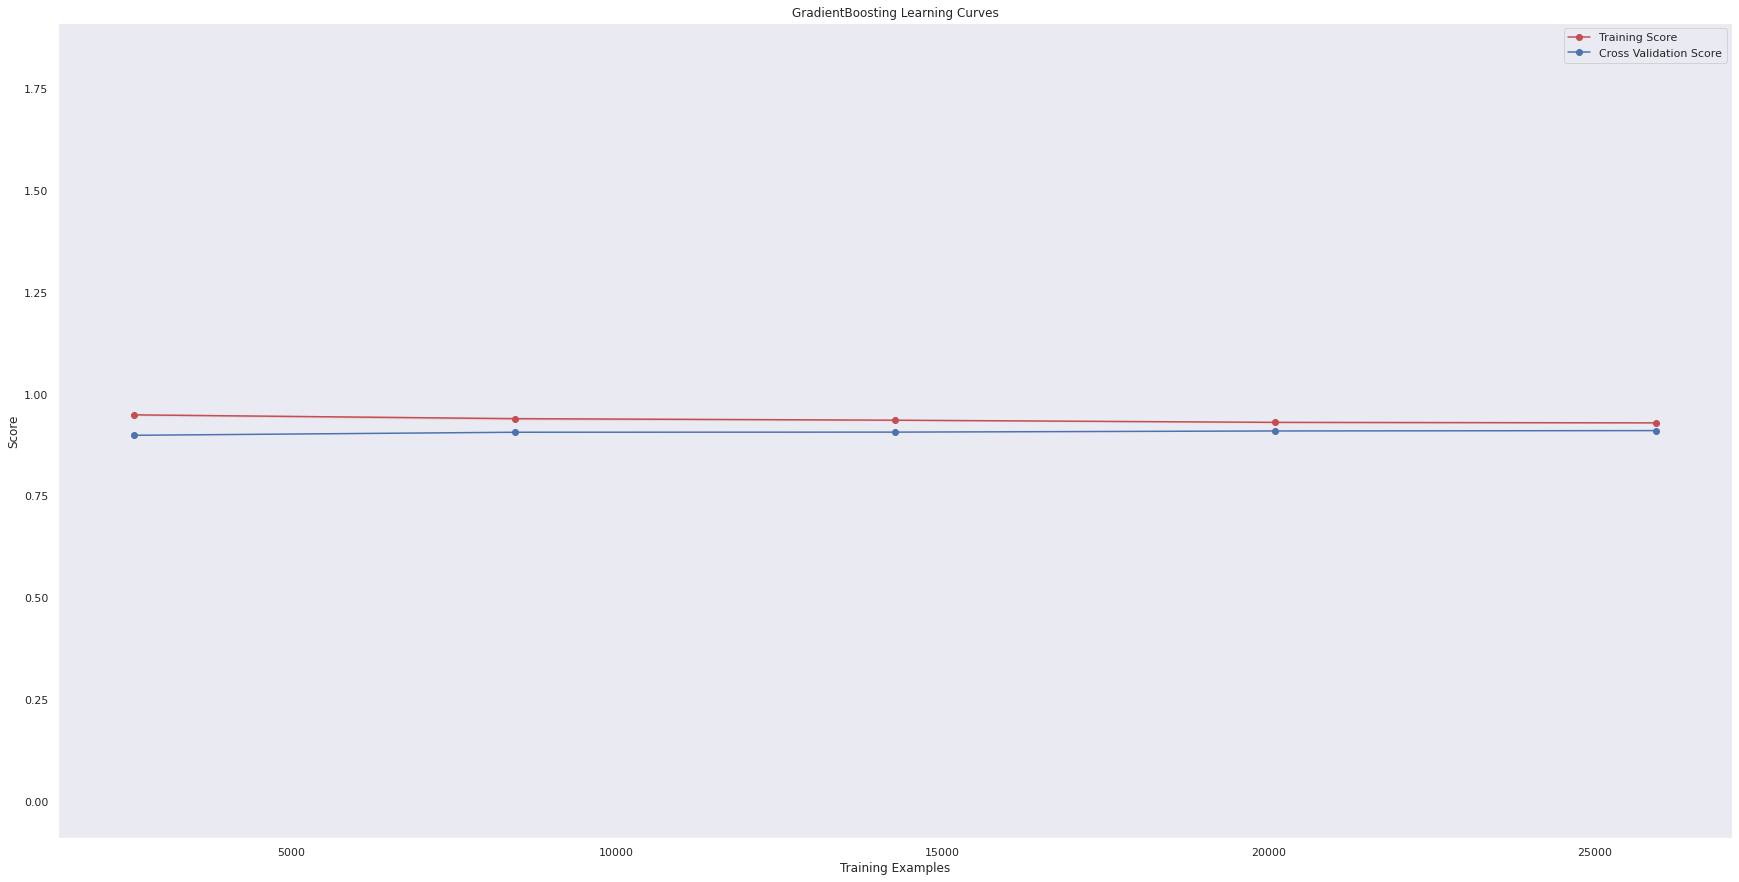

In [77]:
g = plot_learning_curve(gsExtC.best_estimator_, 'ExtraTrees Learning Curves', X_train, y_train, cv=kfold)
g = plot_learning_curve(gsMLP.best_estimator_, 'MLP Learning Curves', X_train, y_train, cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_, 'AdaBoost Learning Curves', X_train, y_train, cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_, 'GradientBoosting Learning Curves', X_train, y_train, cv=kfold)

## 5.2.3. Best Classifiers

As we can see, the best classifiers were ExtraTrees, AdaBoost and GradientBoosting. We will be using them. Let's see their hparams.

GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=150,
                           n_estimators=300)

ExtraTreesClassifier(max_features=12, n_estimators=300)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1, n_estimators=2, random_state=8)
                  

# 6. Evaluating

In [78]:
gb_model = GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=150,
                           n_estimators=300)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=150,
                           n_estimators=300)

In [79]:
gb_prediction = gb_model.predict(X_test)
gb_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
total_1_gb = np.count_nonzero(gb_prediction == 1)
total_1_gb

856

Let's see the confusion matrix for the top 2, GradientBoosting and MLP

Text(156.5, 0.5, 'True')

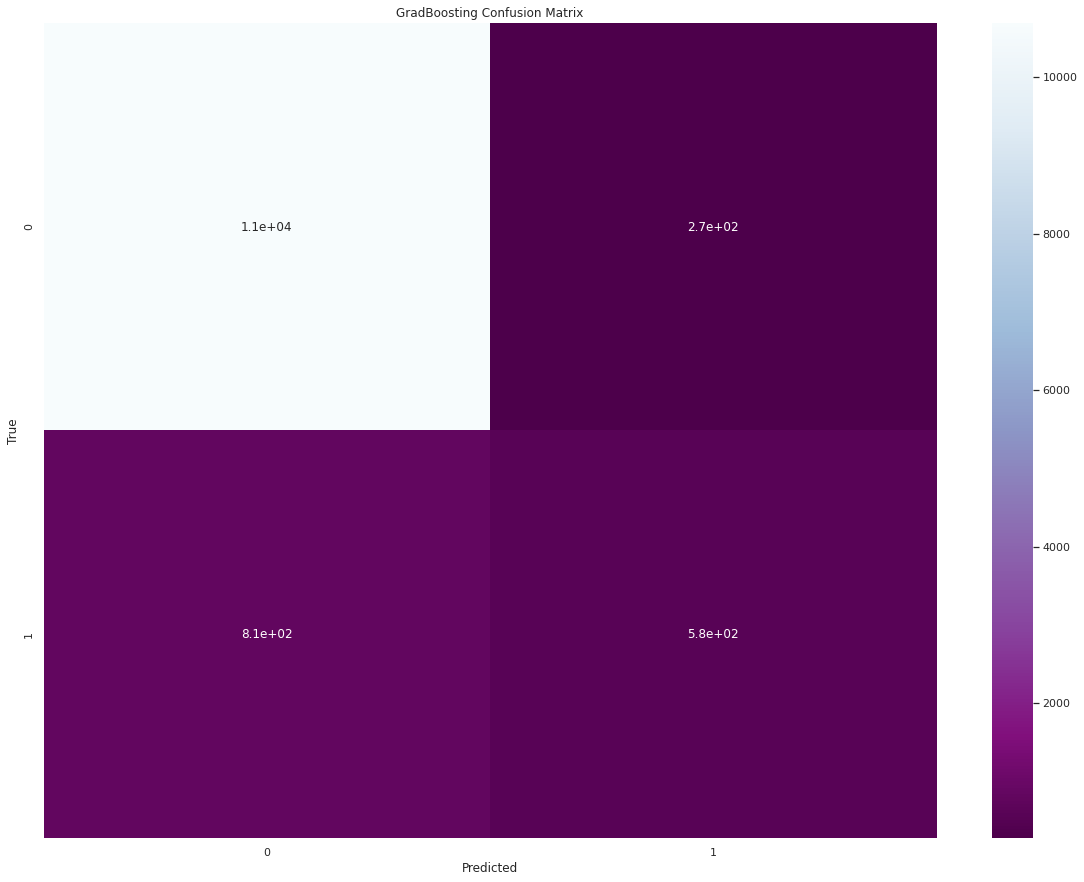

In [81]:
from sklearn.metrics import confusion_matrix
conf_gb = confusion_matrix(y_test, gb_prediction)

plt.figure(figsize=(20,15))
plt.title("GradBoosting Confusion Matrix")
sns.heatmap(conf_gb, cmap='BuPu_r', annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

Extra-Trees

In [82]:
ext_model = ExtraTreesClassifier(max_features=12, n_estimators=300)
ext_model.fit(X_train, y_train)

ExtraTreesClassifier(max_features=12, n_estimators=300)

In [83]:
ext_prediction = ext_model.predict(X_test)
ext_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
total_1_ext = np.count_nonzero(ext_prediction == 1)
total_1_ext

1063

Text(156.5, 0.5, 'True')

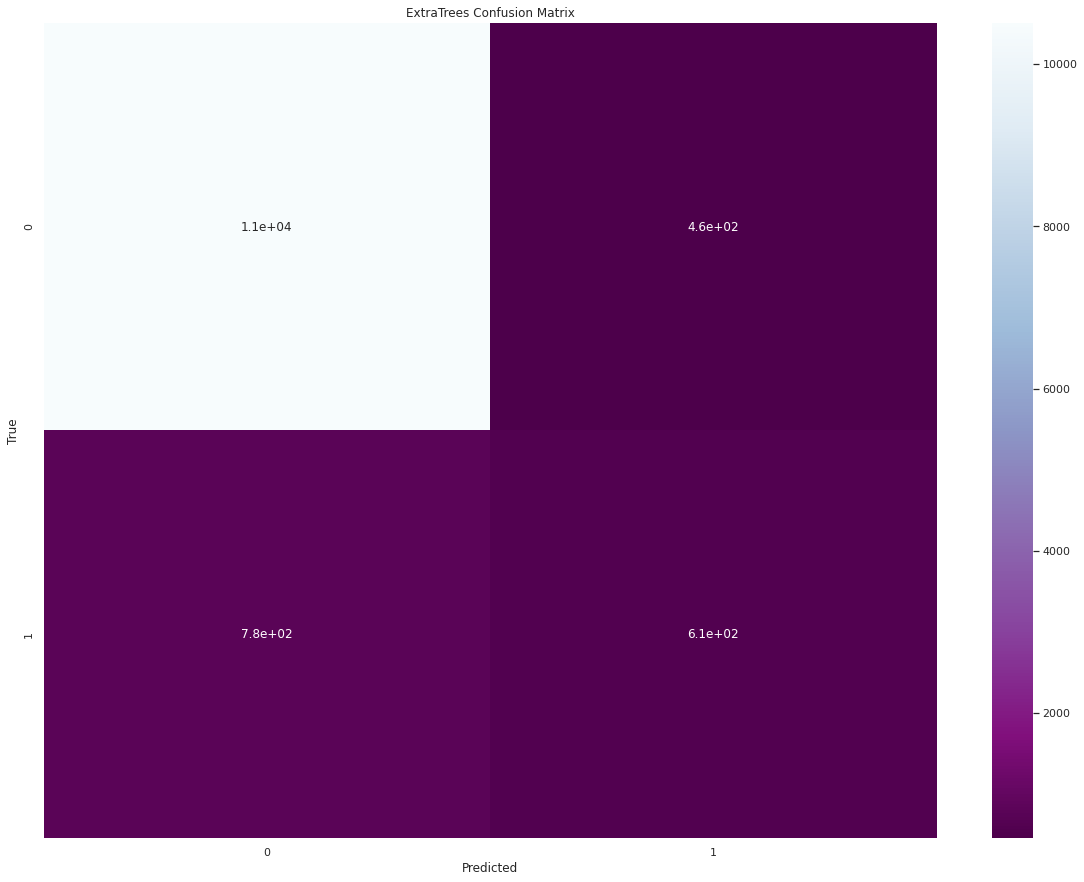

In [85]:
conf_ext = confusion_matrix(y_test, ext_prediction)
plt.figure(figsize=(20,15))
plt.title("ExtraTrees Confusion Matrix")
sns.heatmap(conf_ext, annot=True, cmap='BuPu_r')
plt.xlabel("Predicted")
plt.ylabel("True")

In [86]:
ext_recall = recall_score(y_test, ext_prediction)
ext_recall

0.4360632183908046

Adaboost

In [87]:
ada_model = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1, n_estimators=2, random_state=8)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1, n_estimators=2, random_state=8)

In [88]:
ada_prediction = ada_model.predict(X_test)
ada_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
total_1_ada = np.count_nonzero(ada_prediction == 1)
total_1_ada

1465

Text(156.5, 0.5, 'True')

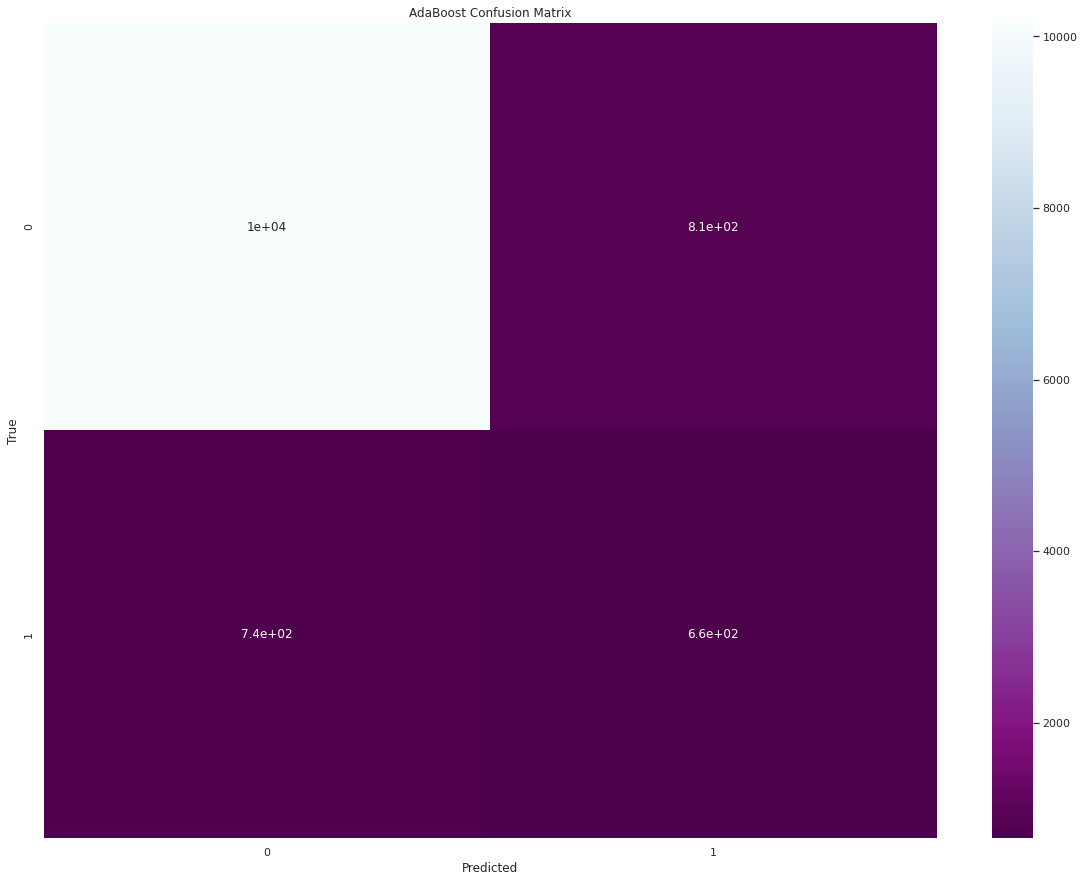

In [90]:
conf_ada = confusion_matrix(y_test, ada_prediction)
plt.figure(figsize=(20,15))
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(conf_ada, annot=True, cmap='BuPu_r')
plt.xlabel("Predicted")
plt.ylabel("True")

In [91]:
ada_recall = recall_score(y_test, ada_prediction)
ada_recall

0.47054597701149425

## Defining a Function
As before, let's create a auxiliary function that will be applied on the pipeline

In [3]:
def prepare_for_training(df):
    """Prepara the dataframe to be trained by a machine learning algorithm
    
    Parameters:
    -----------
    df: dataframe
        The dataframe to be prepared
    
    Returns:
    --------
    X_train: array
        The train input
    X_test: array
        The test input
    y_train: array
        The train target (labels)
    y_test: array
        The test target (labels)
    """
    y = df['y']
    X = df.drop('y',axis=1)
    
    scaler = MinMaxScaler()
    df_array = X
    scaled_data = scaler.fit_transform(df_array)
    
    return train_test_split(scaled_data, y, test_size=0.3, random_state=1, stratify=y)

## Best Model Definition

In [ ]:
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=1, n_estimators=2, random_state=8)

Now we save the model in the cloud using pickle files. As the next cell contains keys, it will not be visible.